## Visualizations

BOROUGH                            object
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                            int64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
SALE DATE                          object
dtype: object
         BOROUGH     SALE PRICE
0      Manhattan 48196678399.00
1         Queens 20066941876.00
2      T

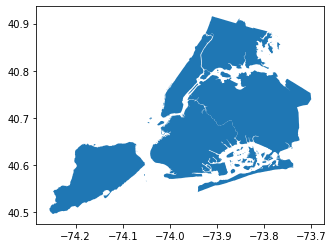

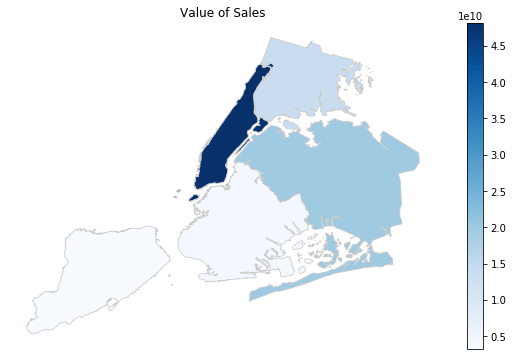

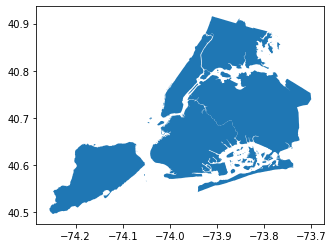

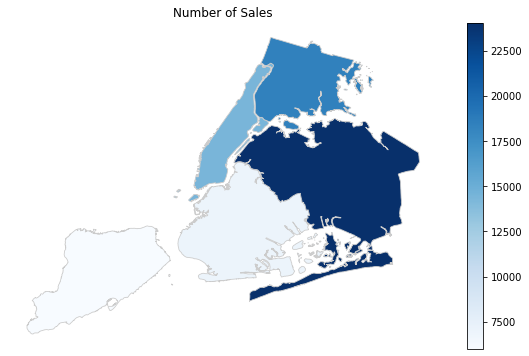

In [2]:
# Imports
import pandas as pd
import functions as fc
import geopandas as gdp
import matplotlib.pyplot as plt

# Read input file
sales_frame = fc.read_csv("data/nyc-rolling-sales1.csv")


# Data Types of the Data Frame post changing
print(sales_frame.dtypes)

# Grouping by Borough (SALE PRICE)
sales_frame_borough_price = sales_frame.groupby(["BOROUGH"])
groupedby_borough_price = sales_frame_borough_price["SALE PRICE"].sum().reset_index(name="Index")
groupedby_borough_price.columns = ["BOROUGH", "SALE PRICE"]

# Sorting after highest value
groupedby_borough_price = groupedby_borough_price.sort_values("SALE PRICE", ascending=False)

# Suppressing scientific float notation
pd.options.display.float_format = "{:.2f}".format

# Resetting index and printing new dataframe
groupedby_borough_price = groupedby_borough_price.reset_index(drop=True)
print(groupedby_borough_price)

# Grouping by Borough (VALUE COUNTS)
sales_frame_borough_counts = sales_frame.groupby(["BOROUGH"])
print(sales_frame_borough_counts)
groupedby_borough_counts = sales_frame_borough_counts["SALE PRICE"].count().reset_index(name="Index")
groupedby_borough_counts.columns = ["BOROUGH", "COUNT"]

# Sorting after highest value
#groupedby_borough_counts = groupedby_borough_counts.sort_values("SALE PRICE", ascending=False)

# Resetting index and printing new dataframe
#groupedby_borough_counts = groupedby_borough_counts.reset_index(drop=True)
print(groupedby_borough_counts)

# conda install geopandas / conda install descartes
fp = "data/geo_nyc.shp"
map_df = gdp.read_file(fp)
# adjusting name of a cell to enable correct merge
map_df["boro_name"] = map_df["boro_name"].replace(["Bronx"], "The Bronx")
#print(map_df.head())

map_df.plot()

#join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index("boro_name").join(groupedby_borough_price.set_index("BOROUGH"))

merged.head()

# set variable to be visualized
variable = "SALE PRICE"

# set range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10,6))

#create map
merged.plot(column=variable, cmap="Blues", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

# give title and remove the axis
plt.title("Value of Sales")
ax.axis("off")

# saving figure
plt.savefig("data/Value of Sales per Borough_Map.jpg", bbox_inches="tight")

# conda install geopandas / conda install descartes
fp = "data/geo_nyc.shp"
map_df2 = gdp.read_file(fp)
# adjusting name of a cell to enable correct merge
map_df2["boro_name"] = map_df2["boro_name"].replace(["Bronx"], "The Bronx")
#print(map_df.head())

map_df2.plot()

#join the geodataframe with the cleaned up csv dataframe
merged2 = map_df2.set_index("boro_name").join(groupedby_borough_counts.set_index("BOROUGH"))

merged2.head()

# set variable to be visualized
variable2 = "COUNT"

# set range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10,6))

#create map
merged2.plot(column=variable2, cmap="Blues", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
# give title and remove the axis
#plt.legend("index")
plt.title("Number of Sales")
ax.axis("off")

# saving figure
plt.savefig("data/Sales per Borough_Map.jpg", bbox_inches="tight")